In [2]:
# Input features: years_experience (số năm kinh nghiệm)
# Output: salary 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv('Salary_Data.csv')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


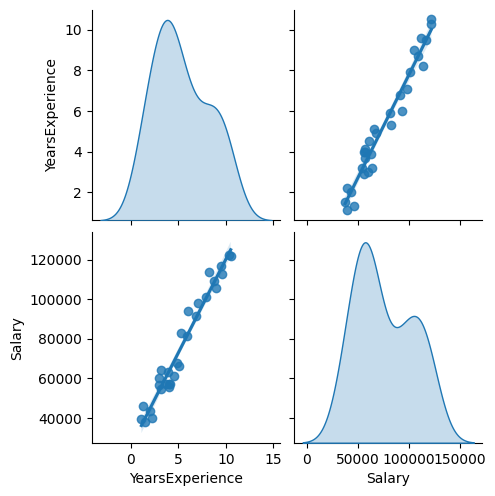

In [3]:
sns.pairplot(df[['YearsExperience', 'Salary']], diag_kind='kde', kind='reg')
plt.show()

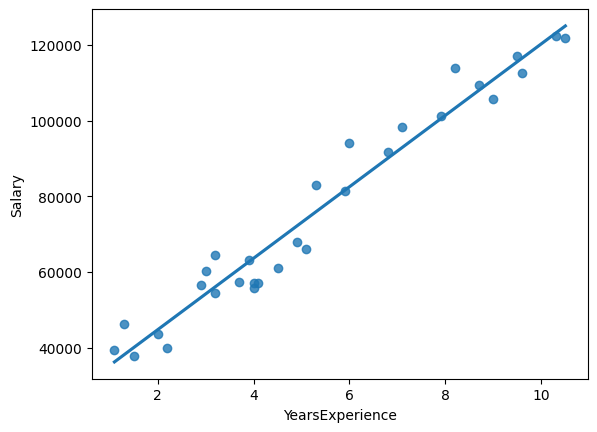

In [4]:
sns.regplot(x=df['YearsExperience'], y=df['Salary'], ci=None)
plt.show()

In [5]:
X = df[['YearsExperience']].values.astype(float)
y = df[['Salary']].values.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model = linear_model.LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_test_pred = model.predict(X_test)

print('Score or R-Squared:', model.score(X_test, y_test))

print('Root Mean Squared Error:', 
      np.sqrt(mean_squared_error(y_test, y_test_pred)))


# điểm R square cho thấy mô hình khá tốt trong việc dự đoán. Điểm RMSE cho thấy sai số trung bình giữa các giá trị dự đoán và giá trị thực tế là khoảng 7059

Score or R-Squared: 0.9024461774180497
Root Mean Squared Error: 7059.04362190151


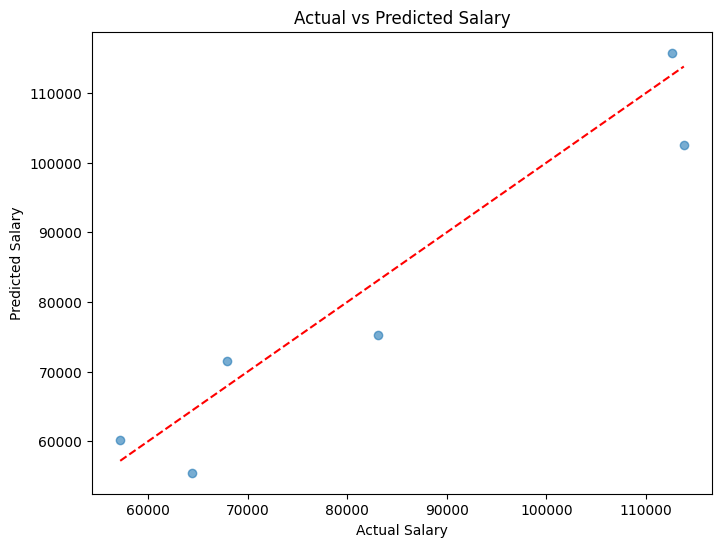

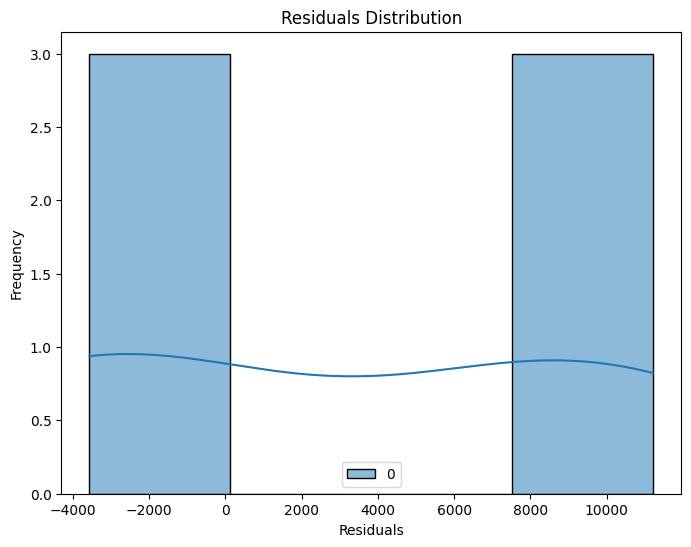

In [13]:
# So sánh giá trị thực tế và dự đoán
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs Predicted Salary')
plt.show()

# Phân tích phân phối residuals
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
